In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# import models from sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate, GridSearchCV, StratifiedShuffleSplit, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
# Classification problem - predicting through variables: C : {}, D: {} for outcome Survived : [0,1]
# 0 = , 1 = 
df = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")
example_sub = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")

In [3]:
df.head()

# recall - survived = 1, dead = 0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
X = df.drop("Survived", axis=1)
Y = df["Survived"]

from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y,test_size = .3, random_state=0)

Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# Data Overview

####  Variable Overview
* Categorical:
    *     Nominal:
            - Cabin 
            - Embarked: C = Cherbourg, Q = Queenstown, S = Southampton
    *     Dichotomous
            - Sex: Male, Female
    *     Ordinal
            - PClass: 1 = Upper, 2 = Middle, 3 = Lower

* Discrete
    - Passenger ID(Unique identifing # for each passenger)
    - SibSp
    - Parch
    - Survived (Our outcome or dependent variable)
* Continous
    - Age
    - Fare   
* Text / ID Variables
    - Ticket Num
    - Passenger Name

In [6]:
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
857,858,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S
52,53,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
386,387,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9000,NaN,S
124,125,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S
578,579,3,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,2689,14.4583,NaN,C


#### Survival by Passenger Sex

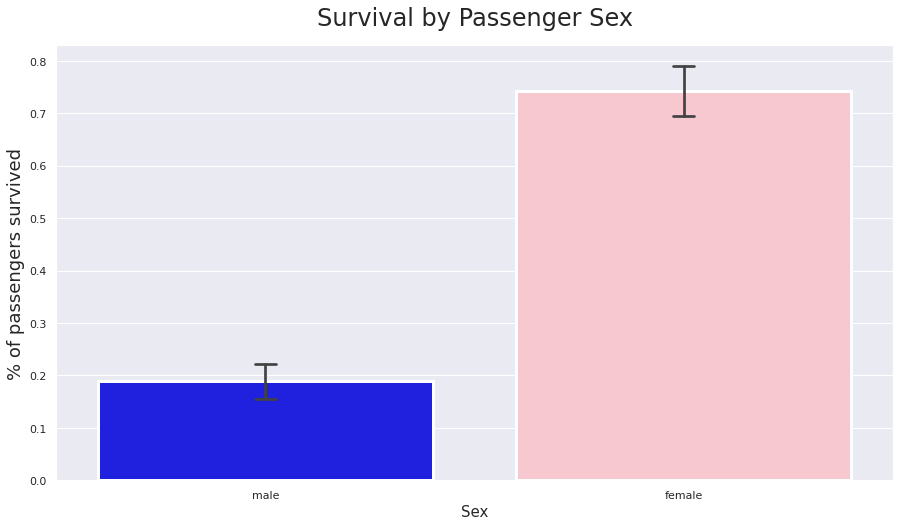

In [7]:
palette = {'male':"blue", 'female':"Pink"}
sns.set(style="darkgrid")
plt.subplots(figsize = (15,8))
ax = sns.barplot(x = "Sex", 
                 y = "Survived", 
                 data=df, 
                 palette = palette,
                 linewidth=3,
                 order = ['male', 'female'],
                 capsize = .05,

                )

plt.title("Survival by Passenger Sex", fontsize = 24,loc = 'center', pad = 20)
plt.ylabel("% of passengers survived", fontsize = 18, )
plt.xlabel("Sex",fontsize = 15);



#### More data visualization to come 

## Feature Engineering

#### Label Encoding the Categorical Data 

In [8]:
print(test_df)

     PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0 

In [9]:
categorical_feats = ['Sex', 'Cabin', 'Embarked', 'Pclass']
id_feats = ['Ticket', 'Name']
non_numeric_feats = categorical_feats + id_feats

all_X_data = pd.concat([X, test_df], axis=0)


for category in categorical_feats:
    encoder = LabelEncoder()
    encoder.fit(all_X_data[category])
    X_train[str('Enc ' + category)] = encoder.transform(X_train[category])
    X_valid[str('Enc ' + category)] = encoder.transform(X_valid[category])
    test_df[str('Enc ' + category)] = encoder.transform(test_df[category])


X_train_numeric = X_train.drop(columns = non_numeric_feats).fillna(value = 0)
X_valid_numeric = X_valid.drop(columns = non_numeric_feats).fillna(value = 0)
test_ids = test_df['PassengerId']
test_df = test_df.drop(columns = non_numeric_feats).fillna(value = 0)

Y_train = Y_train.reset_index(drop = True)
Y_valid = Y_valid.reset_index(drop = True)
test_df = test_df.reset_index(drop = True)

print(Y_valid)

0      0
1      0
2      0
3      1
4      1
      ..
263    0
264    0
265    0
266    1
267    0
Name: Survived, Length: 268, dtype: int64


In [10]:
print(test_df)

     PassengerId   Age  SibSp  Parch      Fare  Enc Sex  Enc Cabin  \
0            892  34.5      0      0    7.8292        1        186   
1            893  47.0      1      0    7.0000        0        186   
2            894  62.0      0      0    9.6875        1        186   
3            895  27.0      0      0    8.6625        1        186   
4            896  22.0      1      1   12.2875        0        186   
..           ...   ...    ...    ...       ...      ...        ...   
413         1305   0.0      0      0    8.0500        1        186   
414         1306  39.0      0      0  108.9000        0         64   
415         1307  38.5      0      0    7.2500        1        186   
416         1308   0.0      0      0    8.0500        1        186   
417         1309   0.0      1      1   22.3583        1        186   

     Enc Embarked  Enc Pclass  
0               1           2  
1               2           2  
2               1           1  
3               2           2  

In [11]:
### Feature Scaling
from sklearn.preprocessing import StandardScaler
st_scale = StandardScaler()

X_train_numeric = st_scale.fit_transform(X_train_numeric)
X_valid_numeric = st_scale.transform(X_valid_numeric)
test_df = st_scale.fit_transform(test_df)

In [12]:
print(test_df)

[[-1.72791209  0.59480137 -0.49947002 ...  0.44752374 -0.47091535
   0.87348191]
 [-1.71962474  1.30589556  0.61699237 ...  0.44752374  0.70076689
   0.87348191]
 [-1.71133739  2.15920859 -0.49947002 ...  0.44752374 -0.47091535
  -0.31581919]
 ...
 [ 1.71133739  0.82235151 -0.49947002 ...  0.44752374  0.70076689
   0.87348191]
 [ 1.71962474 -1.3678186  -0.49947002 ...  0.44752374  0.70076689
   0.87348191]
 [ 1.72791209 -1.3678186   0.61699237 ...  0.44752374 -1.64259759
   0.87348191]]


## Model Building

### Comparing Simple Classification Models

In [13]:
models_dict = {
    "KNeighbors": KNeighborsClassifier(), 
    "LogisticRegression": LogisticRegression(max_iter=1000), 
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(),
    "SupportVectorClassifier": SVC(),
    "MLPClassifier": MLPClassifier(max_iter=1000),
    "XGBoost": XGBClassifier(),
    "LightGBM": LGBMClassifier(),
    "GaussianNB": GaussianNB(),
    
}

In [14]:
#### classification model function using models above
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


def class_model(model_ticker, model_init):
    model = model_init
    model.fit(X_train_numeric, Y_train)
    preds = model.predict(X_valid_numeric)
    print ("Model Metrics for "  + model_ticker )
    print("Confusion Matrix")
    print(pd.DataFrame(confusion_matrix(Y_valid,preds),columns=["Predicted Not-Survived", "Predicted Survived"],index=["Not-Survived","Survived"] ))
    acc_score = accuracy_score(Y_valid, preds)
    print("Accuracy Score: ", round(acc_score, ndigits = 3))
    print("Classification Report")
    print(classification_report(Y_valid, preds)+ " \n")
    
    
    
    
    


In [15]:
class_model("Log Reg", LogisticRegression(max_iter=1000))
for model_ticker, model_init in models_dict.items():
    class_model(model_ticker, model_init)

Model Metrics for Log Reg
Confusion Matrix
              Predicted Not-Survived  Predicted Survived
Not-Survived                     141                  27
Survived                          26                  74
Accuracy Score:  0.802
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       168
           1       0.73      0.74      0.74       100

    accuracy                           0.80       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268
 

Model Metrics for KNeighbors
Confusion Matrix
              Predicted Not-Survived  Predicted Survived
Not-Survived                     143                  25
Survived                          26                  74
Accuracy Score:  0.81
Classification Report
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       168
           1       0.75      0.74      0.7

### Bagging Classifier 

In [16]:
### Bagging approach w. grid search 

from sklearn.ensemble import BaggingClassifier
n_estimators = [10,30,50,70,80,150,160, 170,175,180,185];
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)

parameters = {'n_estimators':n_estimators,}
grid = GridSearchCV(BaggingClassifier(base_estimator= None, bootstrap_features=False), param_grid=parameters, cv=cv,n_jobs = -1)
grid.fit(X_train_numeric,Y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             estimator=BaggingClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [10, 30, 50, 70, 80, 150, 160, 170,
                                          175, 180, 185]})

In [17]:
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)
bagging_grid = grid.best_estimator_
bagging_grid.score(X_train_numeric,Y_train)

0.7914438502673796
{'n_estimators': 160}
BaggingClassifier(n_estimators=160)


1.0

### AdaBoost Classifier

In [18]:
from sklearn.ensemble import AdaBoostClassifier
n_estimators = [100,140,145,150,160, 170,175,180,185];
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)
learning_r = [0.1,1,0.01,0.5]

parameters = {'n_estimators':n_estimators,'learning_rate':learning_r}
grid = GridSearchCV(AdaBoostClassifier(base_estimator= None),
                                 param_grid=parameters,
                                 cv=cv,
                                 n_jobs = -1)
grid.fit(X_train_numeric,Y_train) 

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 1, 0.01, 0.5],
                         'n_estimators': [100, 140, 145, 150, 160, 170, 175,
                                          180, 185]})

In [19]:
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)
adaBoost_grid = grid.best_estimator_
adaBoost_grid.score(X_train_numeric,Y_train)

0.7855614973262032
{'learning_rate': 0.01, 'n_estimators': 175}
AdaBoostClassifier(learning_rate=0.01, n_estimators=175)


0.7865168539325843

### Voting Classifier

In [20]:
from sklearn.ensemble import VotingClassifier

## Create a full model dictionary to create list of all models for voting classifier
models_dict['Bagging Classifier'] = BaggingClassifier(n_estimators=70)
models_dict['AdaBoost Classifier'] = AdaBoostClassifier(learning_rate=0.01, n_estimators=175)
estimators = list(models_dict.items())

In [21]:
print(estimators)

[('KNeighbors', KNeighborsClassifier()), ('LogisticRegression', LogisticRegression(max_iter=1000)), ('DecisionTree', DecisionTreeClassifier()), ('RandomForest', RandomForestClassifier()), ('SupportVectorClassifier', SVC()), ('MLPClassifier', MLPClassifier(max_iter=1000)), ('XGBoost', XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)), ('LightGBM', L

In [22]:
voting_classifier = VotingClassifier(estimators=estimators,voting='hard')
voting_classifier = voting_classifier.fit(X_train_numeric,Y_train)

### Final Submission

In [23]:
# add voting classifier to all models 
models_dict['Voting Classifier'] = voting_classifier


scores = {}
i = 0
for model_name, model in models_dict.items():
    model.fit(X_train_numeric, Y_train)
    preds = model.predict(X_valid_numeric)
    acc_score = accuracy_score(preds, Y_valid)
    scores[model_name] = acc_score
    i = i + 1
    

In [24]:
print(scores)

{'KNeighbors': 0.8097014925373134, 'LogisticRegression': 0.8022388059701493, 'DecisionTree': 0.7574626865671642, 'RandomForest': 0.832089552238806, 'SupportVectorClassifier': 0.7947761194029851, 'MLPClassifier': 0.8283582089552238, 'XGBoost': 0.8097014925373134, 'LightGBM': 0.8283582089552238, 'GaussianNB': 0.7873134328358209, 'Bagging Classifier': 0.8208955223880597, 'AdaBoost Classifier': 0.7873134328358209, 'Voting Classifier': 0.835820895522388}


XGBoost has the highest accuracy score: 'XGBoost': 0.8507462686567164. So it will be used for the final submission.

### Final Submission

In [25]:
print(test_df)

[[-1.72791209  0.59480137 -0.49947002 ...  0.44752374 -0.47091535
   0.87348191]
 [-1.71962474  1.30589556  0.61699237 ...  0.44752374  0.70076689
   0.87348191]
 [-1.71133739  2.15920859 -0.49947002 ...  0.44752374 -0.47091535
  -0.31581919]
 ...
 [ 1.71133739  0.82235151 -0.49947002 ...  0.44752374  0.70076689
   0.87348191]
 [ 1.71962474 -1.3678186  -0.49947002 ...  0.44752374  0.70076689
   0.87348191]
 [ 1.72791209 -1.3678186   0.61699237 ...  0.44752374 -1.64259759
   0.87348191]]


In [26]:
all_X = np.concatenate((X_train_numeric, X_valid_numeric) ,axis=0)
all_Y = np.concatenate((Y_train, Y_valid) ,axis=0)
print(all_X)
print(all_Y)

[[ 1.59014094  1.52926229 -0.457246   ... -0.29156147  0.56011053
  -1.5325562 ]
 [-1.52952238  1.41554077  0.4033711  ... -0.76678344 -2.02469583
  -1.5325562 ]
 [-0.23515275 -1.31377554  3.8458395  ...  0.46447348  0.56011053
   0.84844757]
 ...
 [ 0.67168106  0.16460413  0.4033711  ...  0.46447348 -2.02469583
   0.84844757]
 [ 1.31499051 -0.34714268 -0.457246   ...  0.46447348  0.56011053
   0.84844757]
 [-1.48301808 -1.37063629 -0.457246   ...  0.46447348 -2.02469583
  -1.5325562 ]]
[1 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1
 1 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0
 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1
 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1
 1 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1
 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0

In [27]:
final_model = voting_classifier
model.fit(all_X, all_Y)
preds = model.predict(test_df)

print(preds)




[0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 1 1 1 1 0 0 1 0 0 1]


In [28]:
submission = pd.DataFrame({
        "PassengerId": test_ids,
        "Survived": preds
    })

submission.PassengerId = submission.PassengerId.astype(int)
submission.Survived = submission.Survived.astype(int)

submission.to_csv("submission.csv", index=False)